In [1]:
# 1.0 Importing Libraries

In [1]:
#!pip install pydotplus
#!pip install xgboost

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as XGBRegressor
import sklearn
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import  AdaBoostClassifier


from sklearn.base import ClassifierMixin
from sklearn.utils import all_estimators
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

from scipy import stats

In [55]:
# 2.0 Loading Data

In [56]:
path1="Telecom Churn Dataset/churn-bigml-20.csv"
path2="Telecom Churn Dataset/churn-bigml-80.csv"
df1 = pd.read_csv(path1, sep =",")
df2 = pd.read_csv(path2, sep =",")
data=pd.concat((df1, df2))

In [57]:
data

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


In [58]:
print(f'dataset shape is {data.shape}')

dataset shape is (3333, 20)


In [59]:
print("There are {0} duplicates in the dataset".format(data.duplicated().sum()))

There are 0 duplicates in the dataset


In [60]:
print("Data has {} missing values".format(data.isna().sum().sum()))

Data has 0 missing values


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [62]:
# As there are no nulls or duplicated data, There is no preprocessing up till now.

In [63]:
# EDA

In [64]:
sns.set_style("whitegrid")

<Figure size 432x288 with 0 Axes>

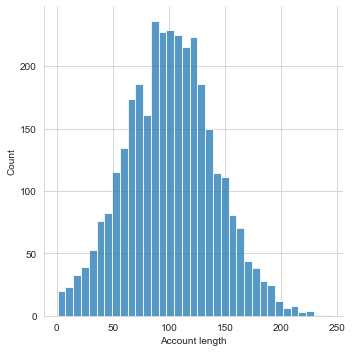

<Figure size 432x288 with 0 Axes>

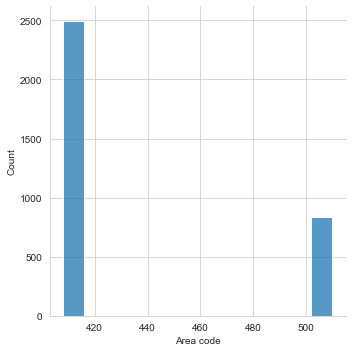

<Figure size 432x288 with 0 Axes>

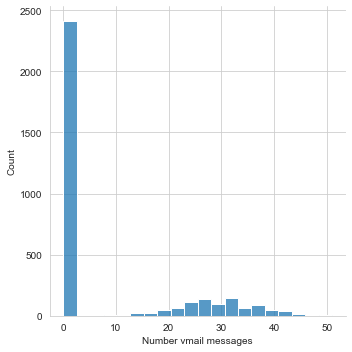

<Figure size 432x288 with 0 Axes>

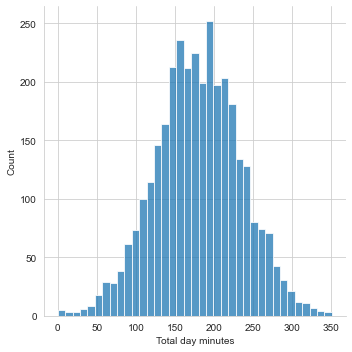

<Figure size 432x288 with 0 Axes>

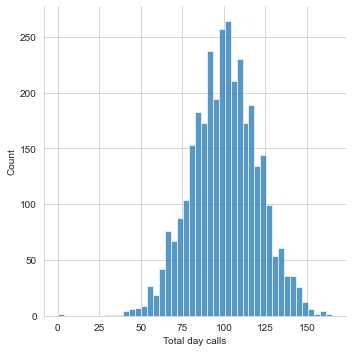

<Figure size 432x288 with 0 Axes>

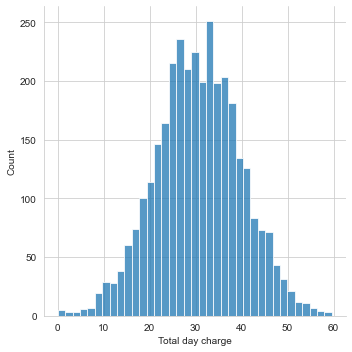

<Figure size 432x288 with 0 Axes>

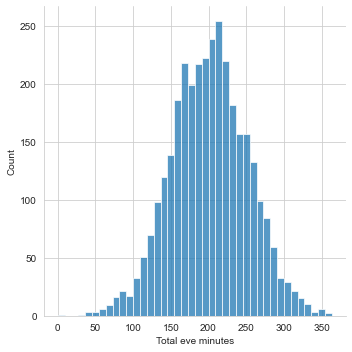

<Figure size 432x288 with 0 Axes>

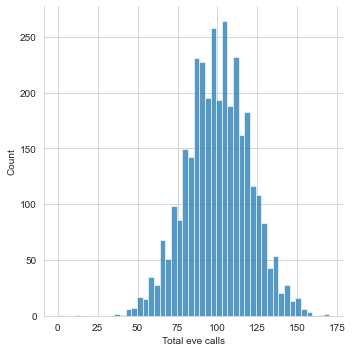

<Figure size 432x288 with 0 Axes>

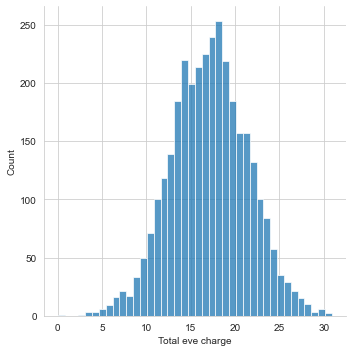

<Figure size 432x288 with 0 Axes>

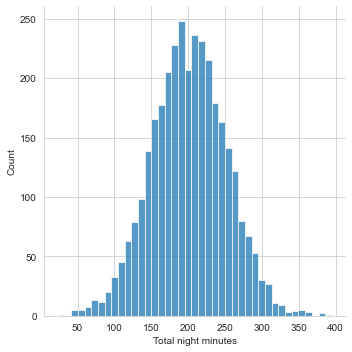

<Figure size 432x288 with 0 Axes>

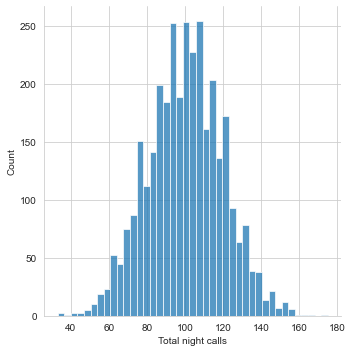

<Figure size 432x288 with 0 Axes>

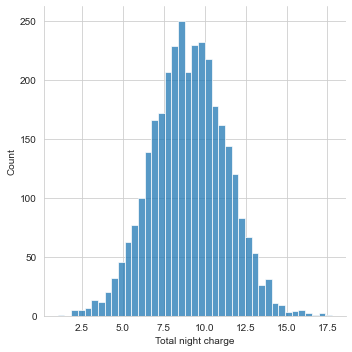

<Figure size 432x288 with 0 Axes>

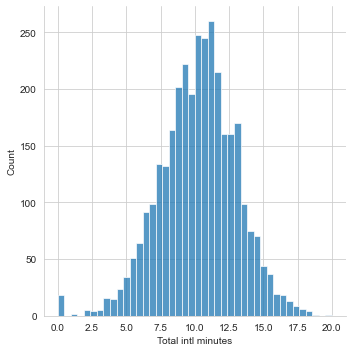

<Figure size 432x288 with 0 Axes>

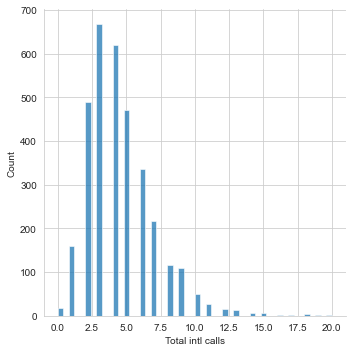

<Figure size 432x288 with 0 Axes>

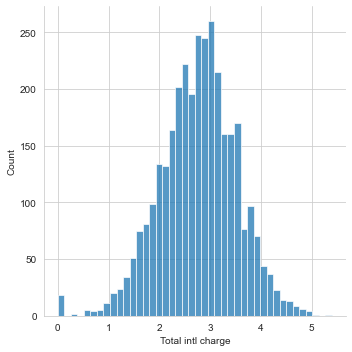

<Figure size 432x288 with 0 Axes>

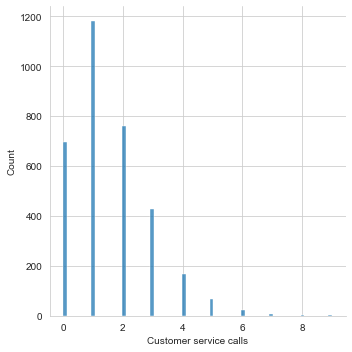

In [65]:
plt.rcParams.update({'figure.max_open_warning': 0})
for column in data.select_dtypes(np.number).columns:
    plt.figure();             # <==================== here!
    ax = sns.displot(data[column]);

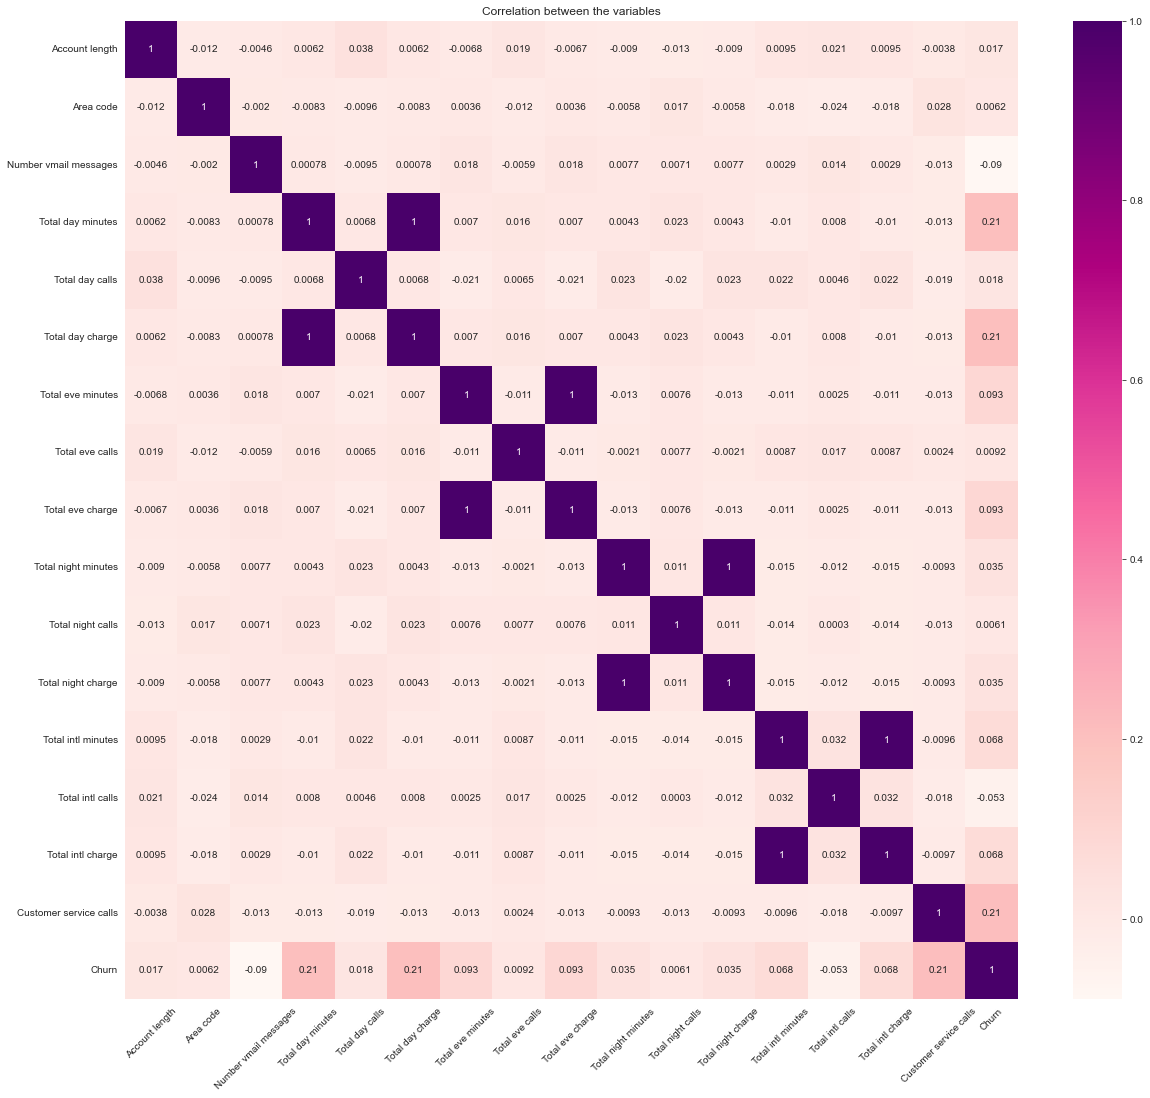

In [66]:
#heatmap for different features
fig, ax = plt.subplots(figsize=(20,18))         # Sample figsize in inches
sns.heatmap(data.corr(), annot = True, ax=ax, cmap="RdPu");
plt.title('Correlation between the variables')
plt.xticks(rotation=45);

In [67]:
# Some information about Churn

In [68]:
data.Churn

0       False
1        True
2        True
3       False
4       False
        ...  
2661    False
2662    False
2663    False
2664    False
2665    False
Name: Churn, Length: 3333, dtype: bool

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


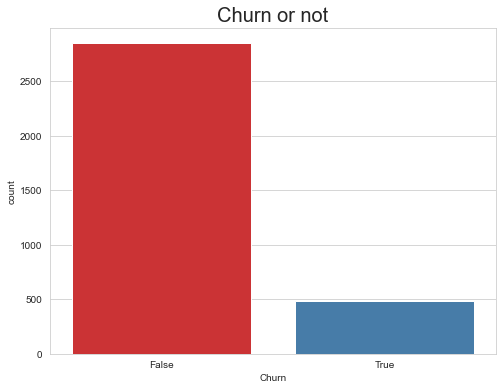

In [69]:
plt.figure(figsize=(8,6));
sns.countplot(data.Churn, palette='Set1');
plt.title('Churn or not',fontsize=20);
plt.show();

In [70]:
for column in data.columns:
    if (data[column].nunique() == 1):
        data.drop(column, axis=1, inplace=True)
        print("We dropped -->  {}  <--- as it has only one value across the column.".format(column))

In [71]:
Qualitative = [f for f in data.columns if data.dtypes[f] == ('object')]

In [72]:
Qualitative

['State', 'International plan', 'Voice mail plan']

In [73]:
data[Qualitative]

,State,International plan,Voice mail plan
0,LA,No,No
1,IN,No,No
2,NY,No,No
3,SC,No,No
4,HI,No,No
...,...,...,...
2661,SC,No,No
2662,AZ,No,Yes
2663,WV,No,No
2664,RI,No,No


In [74]:
# To use get_dummies
# Please note that this list is created only to see the categorical data that has more than 2 values
# You know that may be if we make one hot encoding for all argument may affect the total model performance
# So I am searching if I am gonna drop some values to make the model performance better
Morethan2 = [] 
Equal2 = []

In [75]:
print("Number of different values in each column")
print()
for i in range( len(Qualitative) ):
    if (data[Qualitative[i]].nunique() > 2):
        print("{}".format(Qualitative[i])+" has ----->    " +str(data[Qualitative[i]].nunique()))
        Morethan2.append(Qualitative[i])
    elif (data[Qualitative[i]].nunique() == 2):
        print("{}".format(Qualitative[i])+" has ----->    " +str(data[Qualitative[i]].nunique()))
        Equal2.append(Qualitative[i])

Number of different values in each column

State has ----->    51
International plan has ----->    2
Voice mail plan has ----->    2


In [76]:
data

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


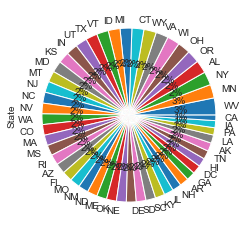

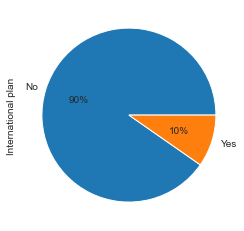

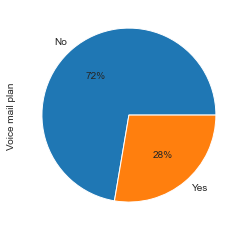

In [77]:
for i in range( len(Qualitative) ):
    data[Qualitative[i]].value_counts().plot(kind='pie',autopct='%1.0f%%', title = None, ylabel= None, fontsize=10)
    plt.show()

In [78]:
#Morethan2
Equal2

['International plan', 'Voice mail plan']

In [79]:
# the next lines to convert columns with two values only into 1, 0.
# I think this way is much better than getdummies as it will make one column instead of two columns.
for column in Equal2:
    data[column] = data[column].map({data[column].unique()[1]:1 ,data[column].unique()[0]:0})

In [80]:
data['State'].value_counts()

WV    106
MN     84
NY     83
AL     80
OR     78
OH     78
WI     78
VA     77
WY     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
KS     70
MD     70
MT     68
NJ     68
NC     68
NV     66
WA     66
CO     66
MA     65
MS     65
RI     65
AZ     64
FL     63
MO     63
NM     62
ND     62
ME     62
OK     61
NE     61
DE     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: State, dtype: int64

In [81]:
data.drop('State', axis=1, inplace=True)

In [82]:
data['Churn'] = data['Churn'].map({data['Churn'].unique()[1]:1 ,data['Churn'].unique()[0]:0})

In [83]:
data

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
1,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
2,161,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
3,111,415,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,0
4,49,510,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,79,415,0,0,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,0
2662,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
2663,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
2664,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0


In [84]:
# dropping outliers
data = data[(np.abs(stats.zscore(data))<3).all(axis=1)]
data

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
1,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
2,161,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
3,111,415,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,0
4,49,510,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,79,415,0,0,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,0
2662,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
2663,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
2664,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0


In [37]:
Target_Name = "Churn"
correlation_matrix = data.corr().round(2)
correlation_matrix[Target_Name]

Account length            0.01
Area code                 0.00
International plan         NaN
Voice mail plan          -0.12
Number vmail messages    -0.11
Total day minutes         0.25
Total day calls           0.04
Total day charge          0.25
Total eve minutes         0.10
Total eve calls           0.02
Total eve charge          0.10
Total night minutes       0.06
Total night calls        -0.00
Total night charge        0.06
Total intl minutes        0.01
Total intl calls         -0.03
Total intl charge         0.01
Customer service calls    0.21
Churn                     1.00
Name: Churn, dtype: float64

In [38]:
data[Target_Name].value_counts()
ratio = data[Target_Name].value_counts()[0]/ len(data[Target_Name])
print("We have {}% ones and the rest are zeros".format(round(ratio,4)*100))
print("We have to make sure that not all predictions are ones")

We have 89.02% ones and the rest are zeros
We have to make sure that not all predictions are ones


In [34]:
#!pip install catboost

In [35]:
# This functions contains Too much manual work, The second one is much better
# To run this function you need to call each model by name This functions,
# But in the second one, all you need to do is to import sklearn that contains all models
'''
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.linear_model import SGDClassifier, RidgeClassifierCV, RidgeClassifier
from sklearn.linear_model import Perceptron, PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
from sklearn.ensemble import StackingRegressor, BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import  HistGradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import SVR
from catboost import Pool, CatBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import NearestCentroid
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import BernoulliNB

def Best_Classifier(X_train, y_train, X_test, y_test):
    models = [LogisticRegression(),LogisticRegressionCV(),DecisionTreeClassifier(),KNeighborsClassifier(),
              DecisionTreeRegressor(),SGDClassifier(),RidgeClassifier(),RidgeClassifierCV(),Perceptron(),
              PassiveAggressiveClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),GaussianNB(),
              SVC(kernel='rbf'),LinearDiscriminantAnalysis(),ExtraTreesClassifier(),BaggingClassifier(),
              HistGradientBoostingClassifier(), AdaBoostClassifier(),QuadraticDiscriminantAnalysis(),
             NearestCentroid(),MLPClassifier(),GaussianProcessClassifier(),BernoulliNB()]   # ,CatBoostClassifier()
    

    
    Model_Info = []  # Contians Sensitivity, Specificity,... for each model
    roc_List = []    # Contains False Positive Rate, Auc,.... for each model
    
    for model in models:
        cv = RepeatedKFold(n_splits=7, n_repeats=3, random_state=1)
        scores1 = cross_val_score(model, X_train, y_train, scoring='accuracy', cv = cv, n_jobs=-1)
        scores2 = cross_val_score(model, X_test, y_test, scoring='accuracy', cv = cv, n_jobs=-1)
    
        model.fit(X_train,y_train)
        Y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test,Y_pred)
        TP = cm[0, 0]
        FP = cm[1, 0]
        FN = cm[0, 1]
        TN = cm[1, 1]
        Sensitivity = (TP/ (TP + FN) )
        Specificity = (TN/ (TN + FP) )
        Presicion = (TP / (TP + FP) )
        F1Score = 2*( (Presicion*Sensitivity) / (Presicion+Sensitivity) )
        sub_data = []    # Sensitivity, Specificity,... for a model
        sub_data.append(str(model).strip("()"))
        sub_data.append(Sensitivity)
        sub_data.append(Specificity)
        sub_data.append(Presicion)
        sub_data.append(F1Score)
        sub_data.append(np.round(scores1.mean()*100,2))
        sub_data.append(np.round(scores2.mean()*100,2))
        Model_Info.append(sub_data)
    
    
    
        try:
            y_score_model = model.predict_proba(X_test)[:,1]
            false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score_model)
            AUC_Score = round(roc_auc_score(y_test, y_score_model)*100,4)
            roc_element = [] # FPR, TPR, Threshold,... of a model
            roc_element.append(str(model).strip("()"))
            roc_element.append(false_positive_rate)
            roc_element.append(true_positive_rate)
            roc_element.append(threshold)
            roc_element.append(AUC_Score)
            roc_List.append(roc_element)
        except:
            pass
    ROC = pd.DataFrame(roc_List, columns=['Name','False Positive Rate','True Positive Rate','Threshold','AUC_Score'])
    Model_Information = pd.DataFrame(Model_Info,columns=['Name','Sensitivity','Specificity','Precision','F1Score','Training Accuracy (%)','Testing Accuracy (%)'])

    return ROC, Model_Information
'''

'\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.linear_model import LogisticRegression, LogisticRegressionCV\nfrom sklearn.linear_model import SGDClassifier, RidgeClassifierCV, RidgeClassifier\nfrom sklearn.linear_model import Perceptron, PassiveAggressiveClassifier\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.tree import DecisionTreeRegressor\nfrom sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier \nfrom sklearn.ensemble import StackingRegressor, BaggingClassifier, ExtraTreesClassifier\nfrom sklearn.ensemble import  HistGradientBoostingClassifier, AdaBoostClassifier\nfrom sklearn.naive_bayes import GaussianNB\nfrom sklearn.metrics import accuracy_score,confusion_matrix\nfrom sklearn.metrics import roc_curve, roc_auc_score\nfrom sklearn.neighbors import KNeighborsRegressor\nfrom sklearn import svm\nfrom sklearn.svm import SVC\nfrom sklearn.svm import SVR\nfrom catboost impor

In [39]:
def Best_Num_Features(data, Target_Name, TestSize, Model_Name, Corr):
    X = data.copy()
    y = data[Target_Name]
    X.drop(Target_Name, axis=1, inplace=True)
    To_Define_Number = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TestSize, random_state = 101, shuffle=True)
    model = Model_Name.fit(X_train, y_train)  # AdaBoostClassifier(), LogisticRegression()
    cv = RepeatedKFold(n_splits=7, n_repeats=3, random_state=1)
    scores1 = cross_val_score(model, X_train, y_train, scoring='accuracy', cv = cv, n_jobs=-1)
    scores2 = cross_val_score(model, X_test, y_test, scoring='accuracy', cv = cv, n_jobs=-1)
    Y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test,Y_pred)
    TP = cm[0, 0]
    FP = cm[1, 0]
    FN = cm[0, 1]
    TN = cm[1, 1]
    Sensitivity = (TP/ (TP + FN) )
    Specificity = (TN/ (TN + FP) )
    Presicion = (TP / (TP + FP) )
    F1Score = 2*( (Presicion*Sensitivity) / (Presicion+Sensitivity) )

    Small_List = []
    Small_List.append(str(X_train.shape[1])+" (Normal)")
    Small_List.append(Sensitivity)
    Small_List.append(Specificity)
    Small_List.append(Presicion)
    Small_List.append(F1Score)
    Small_List.append(np.round(scores1.mean()*100,4))
    Small_List.append(np.round(scores2.mean()*100,4))
    To_Define_Number.append(Small_List)
    
    
    data_1 = data.copy()
    correlation_matrix = data_1.corr().round(2)
    correlation_matrix[Target_Name]

    Small_corr = []
    for column in range( correlation_matrix.shape[0] ):
        if ( abs(correlation_matrix[Target_Name][column]) < Corr):
            #print(correlation_matrix.columns[column] , correlation_matrix['Attrition'][column])
            Small_corr.append(correlation_matrix.columns[column])
    data_1.drop(Small_corr, axis=1, inplace=True)
    data_1.drop(Target_Name, axis=1, inplace=True)
    
    X_train, X_test, y_train, y_test = train_test_split(data_1, y, test_size = TestSize, random_state = 101, shuffle=True)
    model = Model_Name.fit(X_train, y_train)  # AdaBoostClassifier(), LogisticRegression()
    cv = RepeatedKFold(n_splits=7, n_repeats=3, random_state=1)
    scores1 = cross_val_score(model, X_train, y_train, scoring='accuracy', cv = cv, n_jobs=-1)
    scores2 = cross_val_score(model, X_test, y_test, scoring='accuracy', cv = cv, n_jobs=-1)
    Y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test,Y_pred)
    TP = cm[0, 0]
    FP = cm[1, 0]
    FN = cm[0, 1]
    TN = cm[1, 1]
    Sensitivity = (TP/ (TP + FN) )
    Specificity = (TN/ (TN + FP) )
    Presicion = (TP / (TP + FP) )
    F1Score = 2*( (Presicion*Sensitivity) / (Presicion+Sensitivity) )

    Small_List = []
    Small_List.append(str(X_train.shape[1])+" (drop Features<{} corr)".format(Corr))
    Small_List.append(Sensitivity)
    Small_List.append(Specificity)
    Small_List.append(Presicion)
    Small_List.append(F1Score)
    Small_List.append(np.round(scores1.mean()*100,4))
    Small_List.append(np.round(scores2.mean()*100,4))
    To_Define_Number.append(Small_List)
    
    
    for i in range(2, 17):
        Small_List = []
        data_1 = data.copy()
        pca = PCA(n_components=i).fit_transform(data_1)
        X_train, X_test, y_train, y_test = train_test_split(pca, y, test_size = TestSize, random_state = 101, shuffle=True)
    
        model = Model_Name.fit(X_train, y_train)  # AdaBoostClassifier(), LogisticRegression()
        cv = RepeatedKFold(n_splits=7, n_repeats=3, random_state=1)
        scores1 = cross_val_score(model, X_train, y_train, scoring='accuracy', cv = cv, n_jobs=-1)
        scores2 = cross_val_score(model, X_test, y_test, scoring='accuracy', cv = cv, n_jobs=-1)
        Y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test,Y_pred)
        TP = cm[0, 0]
        FP = cm[1, 0]
        FN = cm[0, 1]
        TN = cm[1, 1]
        Sensitivity = (TP/ (TP + FN) )
        Specificity = (TN/ (TN + FP) )
        Presicion = (TP / (TP + FP) )
        F1Score = 2*( (Presicion*Sensitivity) / (Presicion+Sensitivity) )
        
        Small_List = []
        Small_List.append(str(X_train.shape[1]))
        Small_List.append(Sensitivity)
        Small_List.append(Specificity)
        Small_List.append(Presicion)
        Small_List.append(F1Score)
        Small_List.append(np.round(scores1.mean()*100,4))
        Small_List.append(np.round(scores2.mean()*100,4))
        To_Define_Number.append(Small_List)
    something = pd.DataFrame(To_Define_Number, columns=['# of Features (PCA)','Sensitivity','Specificity','Presicion','F1Score','Training Score (%)','Testing Score (%)'])
    return something

In [40]:
#                              data,  Y column , testsize,classification model, correltion limit to drop    
ModelWithN = Best_Num_Features(data, Target_Name, 0.25, LogisticRegression(), 0.01) # AdaBoostClassifier(), LogisticRegression()
ModelWithN

D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

,# of Features (PCA),Sensitivity,Specificity,Presicion,F1Score,Training Score (%),Testing Score (%)
0,18 (Normal),0.908832,0.538462,0.990683,0.947994,88.9515,90.7726
1,16 (drop Features<0.01 corr),0.903683,0.333333,0.990683,0.945185,88.5321,89.4206
2,2,0.903226,1.000000,1.000000,0.949153,88.8899,90.9118
3,3,0.904360,0.750000,0.998447,0.949077,89.0450,90.8660
4,4,0.904360,0.750000,0.998447,0.949077,89.0606,91.0518
5,5,0.905634,0.800000,0.998447,0.949778,89.0451,90.9589
6,6,0.906911,0.833333,0.998447,0.950480,89.0296,91.0060
7,7,0.909605,1.000000,1.000000,0.952663,89.6043,91.6574
8,8,0.909605,1.000000,1.000000,0.952663,89.5733,91.6574
9,9,0.909605,1.000000,1.000000,0.952663,89.7440,91.6574


In [41]:
# DecisionTreeRegressor(), CatBoostClassifier()
def Best_Classifier(X_train, y_train, X_test, y_test):

    classifiers=[est for est in all_estimators() if issubclass(est[1], ClassifierMixin)]
    Model_Info = []  # Contians Sensitivity, Specificity,... for each model
    roc_List = []    # Contains False Positive Rate, Auc,.... for each model
    Neglected_Models = []
    for i in range(len(classifiers)):
        try:
            model = classifiers[i][1]()
            cv = RepeatedKFold(n_splits=7, n_repeats=3, random_state=1)
            scores1 = cross_val_score(model, X_train, y_train, scoring='accuracy', cv = cv, n_jobs=-1)
            print('Average Training Score for {} = {}%'.format(classifiers[i][0],np.round(scores1.mean()*100,2)))
            scores2 = cross_val_score(model, X_test, y_test, scoring='accuracy', cv = cv, n_jobs=-1)
            print('Average Testing Score for {} = {}%'.format(classifiers[i][0],np.round(scores2.mean()*100,2)))
            
            
            model.fit(X_train,y_train)
            Y_pred = model.predict(X_test)
            cm = confusion_matrix(y_test,Y_pred)
            TP = cm[0, 0]
            FP = cm[1, 0]
            FN = cm[0, 1]
            TN = cm[1, 1]
            Sensitivity = (TP/ (TP + FN) )
            Specificity = (TN/ (TN + FP) )
            Presicion = (TP / (TP + FP) )
            F1Score = 2*( (Presicion*Sensitivity) / (Presicion+Sensitivity) )
            sub_data = []    # Sensitivity, Specificity,... for a model
            sub_data.append(str(model).strip("()"))
            sub_data.append(Sensitivity)
            sub_data.append(Specificity)
            sub_data.append(Presicion)
            sub_data.append(F1Score)
            sub_data.append(np.round(scores1.mean()*100,2))
            sub_data.append(np.round(scores2.mean()*100,2))
            Model_Info.append(sub_data)
            
            try:
                y_score_model = model.predict_proba(X_test)[:,1]
                false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score_model)
                AUC_Score = round(roc_auc_score(y_test, y_score_model)*100,4)
                roc_element = [] # FPR, TPR, Threshold,... of a model
                roc_element.append(str(model).strip("()"))
                roc_element.append(false_positive_rate)
                roc_element.append(true_positive_rate)
                roc_element.append(threshold)
                roc_element.append(AUC_Score)
                roc_List.append(roc_element)
            except:
                pass
        except:
            Neglected_Models.append(classifiers[i])
            #pass
    
    ROC = pd.DataFrame(roc_List, columns=['Name','False Positive Rate','True Positive Rate','Threshold','AUC_Score'])
    Model_Information = pd.DataFrame(Model_Info,columns=['Name','Sensitivity','Specificity','Precision','F1Score','Training Accuracy (%)','Testing Accuracy (%)'])
            
    

    return ROC, Model_Information, Neglected_Models

In [42]:
print("1. Not to drop Anything")
print("2. to use PCA")
print("3. to drop features with lower correlation")
Input = input("Enter what do you want 1,2,3")
data_1 = data.copy()
X = data_1.drop(Target_Name,axis=1)
y = data_1[Target_Name]

if (Input == '1'):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101, shuffle=True)

elif (Input == '2'):
    Input2 = input("Please, Enter number of PCA")
    pca = PCA(n_components=int(Input2)).fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(pca, y, test_size = 0.25, random_state = 101, shuffle=True)

elif (Input == '3'):
    Small_corr = []
    for column in range( correlation_matrix.shape[0] ):
        if ( abs(correlation_matrix[Target_Name][column]) < 0.09):
            #print(correlation_matrix.columns[column] , correlation_matrix['Attrition'][column])
            Small_corr.append(correlation_matrix.columns[column])
    data_1.drop(Small_corr, axis=1, inplace=True)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101, shuffle=True)
else:
    pass

1. Not to drop Anything
2. to use PCA
3. to drop features with lower correlation


Enter what do you want 1,2,3 1


In [43]:
#print("Now, we have only {} columns in our data that have strong relation with Attrition".format(data_1.shape[1]))
#corr = data_1.corr()
#plt.figure(figsize=(12,12))
#sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='Reds')

In [44]:
# I decided to use Total Number of features = 1
# ------------------------- I will not use the whole data

In [45]:
ROC, Model_Information, Neglected_Models = Best_Classifier(X_train, y_train, X_test, y_test)
ROC

Average Training Score for AdaBoostClassifier = 89.81%
Average Testing Score for AdaBoostClassifier = 90.07%
Average Training Score for BaggingClassifier = 94.78%
Average Testing Score for BaggingClassifier = 94.5%
Average Training Score for BernoulliNB = 88.67%
Average Testing Score for BernoulliNB = 90.07%


C:\Users\Omar El-Sakka\AppData\Local\Temp\ipykernel_11500\667206299.py:26: RuntimeWarning: invalid value encountered in longlong_scalars
  Specificity = (TN/ (TN + FP) )


Average Training Score for CalibratedClassifierCV = 88.77%
Average Testing Score for CalibratedClassifierCV = 89.98%


D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Average Training Score for CategoricalNB = nan%
Average Testing Score for CategoricalNB = nan%
Average Training Score for ComplementNB = 60.67%
Average Testing Score for ComplementNB = 67.37%
Average Training Score for DecisionTreeClassifier = 91.17%
Average Testing Score for DecisionTreeClassifier = 92.4%
Average Training Score for DummyClassifier = 88.67%
Average Testing Score for DummyClassifier = 90.07%
Average Training Score for ExtraTreeClassifier = 88.56%


C:\Users\Omar El-Sakka\AppData\Local\Temp\ipykernel_11500\667206299.py:26: RuntimeWarning: invalid value encountered in longlong_scalars
  Specificity = (TN/ (TN + FP) )


Average Testing Score for ExtraTreeClassifier = 88.39%
Average Training Score for ExtraTreesClassifier = 94.3%
Average Testing Score for ExtraTreesClassifier = 92.96%
Average Training Score for GaussianNB = 90.83%
Average Testing Score for GaussianNB = 91.38%
Average Training Score for GaussianProcessClassifier = 86.71%
Average Testing Score for GaussianProcessClassifier = 90.07%
Average Training Score for GradientBoostingClassifier = 94.48%
Average Testing Score for GradientBoostingClassifier = 94.69%
Average Training Score for HistGradientBoostingClassifier = 95.21%
Average Testing Score for HistGradientBoostingClassifier = 92.68%
Average Training Score for KNeighborsClassifier = 90.66%
Average Testing Score for KNeighborsClassifier = 91.61%
Average Training Score for LabelPropagation = 88.67%
Average Testing Score for LabelPropagation = 90.07%


D:\Anaconda3\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:222: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Omar El-Sakka\AppData\Local\Temp\ipykernel_11500\667206299.py:26: RuntimeWarning: invalid value encountered in longlong_scalars
  Specificity = (TN/ (TN + FP) )
D:\Anaconda3\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:222: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


Average Training Score for LabelSpreading = 88.67%
Average Testing Score for LabelSpreading = 90.07%


D:\Anaconda3\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:222: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Omar El-Sakka\AppData\Local\Temp\ipykernel_11500\667206299.py:26: RuntimeWarning: invalid value encountered in longlong_scalars
  Specificity = (TN/ (TN + FP) )
D:\Anaconda3\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:222: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


Average Training Score for LinearDiscriminantAnalysis = 89.11%
Average Testing Score for LinearDiscriminantAnalysis = 90.49%
Average Training Score for LinearSVC = 81.28%
Average Testing Score for LinearSVC = 78.31%


D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Omar El-Sakka\AppData\Local\Temp\ipykernel_11500\667206299.py:26: RuntimeWarning: invalid value encountered in longlong_scalars
  Specificity = (TN/ (TN + FP) )


Average Training Score for LogisticRegression = 88.95%
Average Testing Score for LogisticRegression = 90.77%


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Average Training Score for LogisticRegressionCV = 89.46%
Average Testing Score for LogisticRegressionCV = 91.47%


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

Average Training Score for MLPClassifier = 89.59%
Average Testing Score for MLPClassifier = 90.07%
Average Training Score for MultinomialNB = 65.39%
Average Testing Score for MultinomialNB = 72.82%
Average Training Score for NearestCentroid = 65.56%
Average Testing Score for NearestCentroid = 69.05%


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
21 fits failed out of a total of 21.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 315, in _dense_fit
    ) = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 189, in sklearn.svm._libsvm.fit
ValueError

Average Training Score for NuSVC = nan%
Average Testing Score for NuSVC = nan%
Average Training Score for PassiveAggressiveClassifier = 84.5%
Average Testing Score for PassiveAggressiveClassifier = 84.56%
Average Training Score for Perceptron = 74.69%
Average Testing Score for Perceptron = 82.27%
Average Training Score for QuadraticDiscriminantAnalysis = 56.98%
Average Testing Score for QuadraticDiscriminantAnalysis = 53.85%


D:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Average Training Score for RadiusNeighborsClassifier = nan%
Average Testing Score for RadiusNeighborsClassifier = nan%
Average Training Score for RandomForestClassifier = 95.04%
Average Testing Score for RandomForestClassifier = 93.43%
Average Training Score for RidgeClassifier = 88.67%
Average Testing Score for RidgeClassifier = 90.31%
Average Training Score for RidgeClassifierCV = 88.67%
Average Testing Score for RidgeClassifierCV = 90.26%
Average Training Score for SGDClassifier = 88.72%
Average Testing Score for SGDClassifier = 81.29%
Average Training Score for SVC = 88.67%
Average Testing Score for SVC = 90.07%


C:\Users\Omar El-Sakka\AppData\Local\Temp\ipykernel_11500\667206299.py:26: RuntimeWarning: invalid value encountered in longlong_scalars
  Specificity = (TN/ (TN + FP) )


,Name,False Positive Rate,True Positive Rate,Threshold,AUC_Score
0,AdaBoostClassifier,"[0.0, 0.0, 0.0, 0.0015527950310559005, 0.00155...","[0.0, 0.014084507042253521, 0.0563380281690140...","[1.6912133345471303, 0.6912133345471304, 0.523...",84.1396
1,BaggingClassifier,"[0.0, 0.0, 0.0, 0.003105590062111801, 0.007763...","[0.0, 0.28169014084507044, 0.49295774647887325...","[2.0, 1.0, 0.9, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, ...",87.6214
2,BernoulliNB,"[0.0, 0.5822981366459627, 0.7236024844720497, ...","[0.0, 0.704225352112676, 0.8309859154929577, 1...","[1.1693347994464647, 0.1693347994464646, 0.136...",57.1921
3,CalibratedClassifierCV,"[0.0, 0.0, 0.003105590062111801, 0.00310559006...","[0.0, 0.014084507042253521, 0.0140845070422535...","[1.7218437483648912, 0.7218437483648913, 0.645...",79.0088
4,ComplementNB,"[0.0, 0.0, 0.0, 0.0015527950310559005, 0.00155...","[0.0, 0.056338028169014086, 0.1408450704225352...","[2.0, 1.0, 0.9999999999877218, 0.9999999999777...",71.9928
5,DecisionTreeClassifier,"[0.0, 0.06521739130434782, 1.0]","[0.0, 0.6619718309859155, 1.0]","[2.0, 1.0, 0.0]",79.8377
6,DummyClassifier,"[0.0, 1.0]","[0.0, 1.0]","[1.1132867132867132, 0.11328671328671329]",50.0000
7,ExtraTreeClassifier,"[0.0, 0.08074534161490683, 1.0]","[0.0, 0.4507042253521127, 1.0]","[2.0, 1.0, 0.0]",68.4979
8,ExtraTreesClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.014084507042253521, 0.0704225352112676...","[1.9300000000000002, 0.93, 0.88, 0.85, 0.83, 0...",88.0839
9,GaussianNB,"[0.0, 0.0, 0.0, 0.0015527950310559005, 0.00155...","[0.0, 0.014084507042253521, 0.0704225352112676...","[1.9990306393041348, 0.9990306393041349, 0.991...",80.4370


<Figure size 432x288 with 0 Axes>

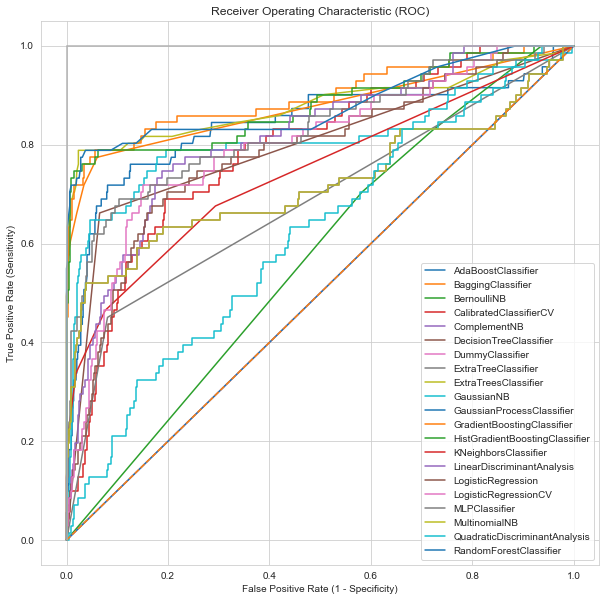

In [46]:
plt.figure()
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic (ROC)')

for i in range(ROC.shape[0]):
    plt.plot(ROC.loc[i]["False Positive Rate"], ROC.loc[i]["True Positive Rate"], label = ROC.loc[i]["Name"])    
    
    
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.legend()
plt.show()

In [47]:
Model_Information

,Name,Sensitivity,Specificity,Precision,F1Score,Training Accuracy (%),Testing Accuracy (%)
0,AdaBoostClassifier,0.938531,0.625000,0.972050,0.954996,89.81,90.07
1,BaggingClassifier,0.958021,0.895833,0.992236,0.974828,94.78,94.50
2,BernoulliNB,0.900699,NaN,1.000000,0.947756,88.67,90.07
3,CalibratedClassifierCV,0.907801,0.600000,0.993789,0.948851,88.77,89.98
4,ComplementNB,0.939547,0.147799,0.579193,0.716619,60.67,67.37
5,DecisionTreeClassifier,0.961661,0.528090,0.934783,0.948031,91.17,92.40
6,DummyClassifier,0.900699,NaN,1.000000,0.947756,88.67,90.07
7,ExtraTreeClassifier,0.938193,0.380952,0.919255,0.928627,88.56,88.39
8,ExtraTreesClassifier,0.952593,0.975000,0.998447,0.974981,94.30,92.96
9,GaussianNB,0.953775,0.621212,0.961180,0.957463,90.83,91.38


In [48]:
Best_List = []

In [49]:
Aspects = ['Sensitivity','Specificity','Precision','F1Score','Training Accuracy (%)','Testing Accuracy (%)']

In [50]:
for column in Aspects:
    for i in range(Model_Information.shape[0]):
        if (Model_Information.loc[i][column] == max(Model_Information[column])):
            print("Max {} is in {}".format(column, Model_Information.loc[i]["Name"]))
            List_Element = []
            List_Element.append(column)
            List_Element.append(Model_Information.loc[i]["Name"])
            List_Element.append(max(Model_Information[column]))
            Best_List.append(List_Element)

Max Sensitivity is in RandomForestClassifier
Max Specificity is in RidgeClassifier
Max Specificity is in RidgeClassifierCV(alphas=array([ 0.1,  1. , 10. ]
Max Precision is in BernoulliNB
Max Precision is in DummyClassifier
Max Precision is in LabelPropagation
Max Precision is in LabelSpreading
Max Precision is in LinearSVC
Max Precision is in RidgeClassifier
Max Precision is in RidgeClassifierCV(alphas=array([ 0.1,  1. , 10. ]
Max Precision is in SVC
Max F1Score is in RandomForestClassifier
Max Training Accuracy (%) is in HistGradientBoostingClassifier
Max Testing Accuracy (%) is in GradientBoostingClassifier


In [51]:
Best_Model = pd.DataFrame(Best_List,columns=['Aspect','Name of Best','With Value'])
Best_Model

,Aspect,Name of Best,With Value
0,Sensitivity,RandomForestClassifier,0.968230
1,Specificity,RidgeClassifier,1.000000
2,Specificity,"RidgeClassifierCV(alphas=array([ 0.1, 1. , 10. ]",1.000000
3,Precision,BernoulliNB,1.000000
4,Precision,DummyClassifier,1.000000
5,Precision,LabelPropagation,1.000000
6,Precision,LabelSpreading,1.000000
7,Precision,LinearSVC,1.000000
8,Precision,RidgeClassifier,1.000000
9,Precision,"RidgeClassifierCV(alphas=array([ 0.1, 1. , 10. ]",1.000000


In [52]:
# Please note that we may we have sensitivity of  model1 equal 1  (FN = 0)
# and Specificity of model2 equal 1  (FP = 0)
# And we stack a model of those two models
# If model1 says it is Negative (It will be Negative for sure)
# If model2 says it is Positive (It will be Positive for sure)
# This would make better performance